<a href="https://colab.research.google.com/github/AnnanyaV/kaggle/blob/master/Modcloth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODCLOTH DATA-PREPROCESSING
## **About the dataset**

>This dataset contains self-reported clothing-fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.) from 2 websites:
>1. [Modcloth](http://modcloth.com)
>2. [Renttherunway](http://renttherunway.com)
>
>[[1]](#references) ModCloth sells women’s vintage clothing and accessories, from which the curator of the dataset collected data from three categories: dresses, tops, and bottoms. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions; they collected data from several categories. 
>
>**Note:** In both datasets, fit feedback belongs to one of three classes: ‘Small,’ ‘Fit,’ and ‘Large.’ And also, some [assumptions](#assumptions) have been made about the features in the dataset.

In [68]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

#  [Modcloth](http://modcloth.com) Dataset

## Importing data using Pandas 

Using the pd.read_json() function the json file is brought into a pandas DataFrame, with the *lines* parameter as *True*- because every new object is separated by a new line. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
# YOUR CODE HERE
mc_df= pd.read_json('/content/drive/My Drive/aiet data/modcloth_final_data.json', lines=True)
mc_df

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36.0,outerwear,NaN,5ft 8in,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34.0,outerwear,NaN,5ft 5in,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32.0,outerwear,NaN,5ft 4in,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,NaN,NaN,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


<a id="4"></a>
# EDA - Exploratory Data Analysis

We can already make few observations here, by looking at the head of the data:
1. There are missing values across the dataframe, which need to be handled.
2. Cup-size contains multiple preferences- which will need handling, if we wish to define cup sizes as 'category' datatype.
3. Height column needs to be parsed for extracting the height in a numerical quantity, it looks like a string (object) right now.
4. Not so important, but some columns could do with some renaming- for removing spaces.

Firstly, we handle the naming of columns for ease-of-access in pandas.

In [70]:
# YOUR CODE HERE
mc_df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [71]:
mc_df.columns= ['item_id', 'waist', 'mc_size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text']

In [72]:
# Check Info
mc_df.info()
# YOUR CODE HERE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   mc_size         82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [73]:
mc_df.isna().sum()

item_id               0
waist             79908
mc_size               0
quality              68
cup_size           6255
hips              26726
bra_size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64

We can extend our observations on missing data and the datatypes here:
* Out of 18 columns, only 6 columns have complete data.
* Quite a lot of data seems to be missing in bust, shoe width, shoe size and waist.
* We might want to especially look at the items which **have** shoe size and shoe width available- these could possibly be shoes!
* Alot of the columns have strings (object datatype), which needs to be parsed into the category datatype (aids in efficient memory consumption as well). 
* *Waist* column surprisingly has a lot of NULL values- considering most of the data from Modcloth comes from the 3 categories of 'dresses, tops and bottoms'.

### Looking at the percentage of missing values per column

In [74]:
missing_data=pd.DataFrame({'missing_values':(mc_df.isna().sum()), 'perc_miss':(mc_df.isna().sum()/82790)*100})
missing_data

,missing_values,perc_miss
item_id,0,0.000000
waist,79908,96.518903
mc_size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


### Statistical description of numerical variables

In [75]:
mc_df.describe(include='O')

,cup_size,category,bust,height,user_name,length,fit,shoe_width,review_summary,review_text
count,76535,82790,11854,81683,82790,82755,82790,18607,76065,76065
unique,12,7,40,41,32429,5,3,3,61713,73313
top,c,new,36,5ft 4in,Sarah,just right,fit,average,Love it!,Love it!
freq,18370,21488,2055,11928,729,61944,56757,13097,185,153


In [76]:
mc_df.describe()

,item_id,waist,mc_size,quality,hips,bra_size,user_id,shoe_size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


Some more important observations here, before we dive into performing the pre-processing tasks onto our data:
* Bra_size, hips might not need to be a float- category dtype?
* Most of the shoe sizes are around 5-9, but the maximum shoe size is 38! (It is surprising as the website uses UK shoe sizing.)
* Size has a minimum of 0 and maximum Size matches the maximum shoe size.

Let's visualize the numerical quantities in our dataset as boxplots, to have a better sense of the outliers.

<a id="5"></a>
## Boxplot of numerical variables

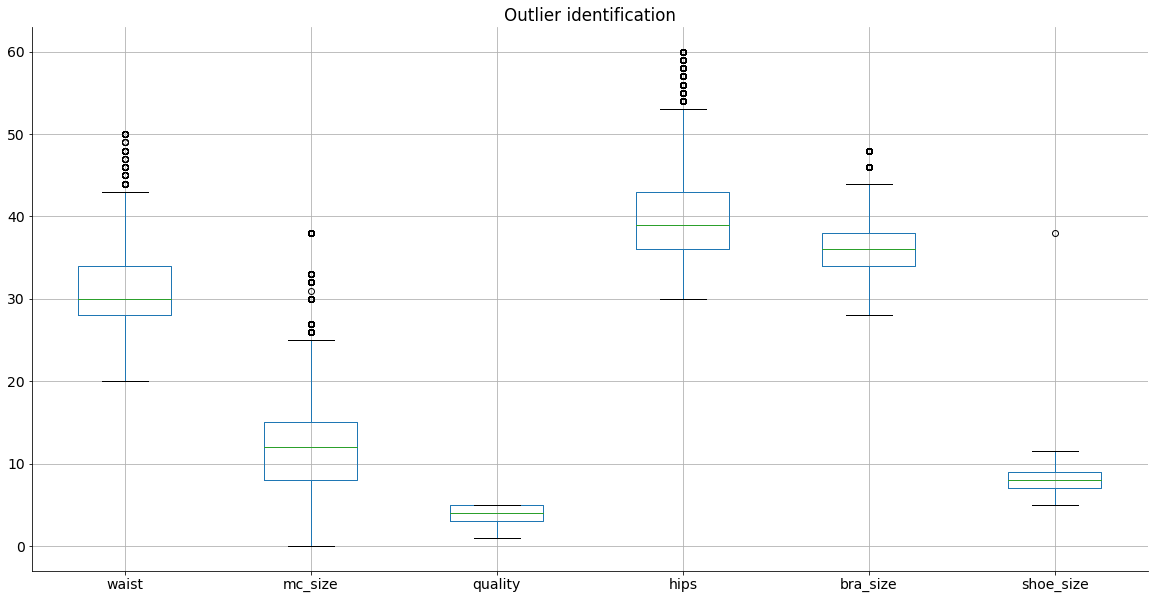

In [77]:
num_cols= ['waist', 'mc_size', 'quality', 'hips', 'bra_size',
       'shoe_size']
plt.figure(figsize=(20,10))
plt.title('Outlier identification')
mc_df[num_cols].boxplot()
plt.show()
plt.close()

<a id="6"></a>
## Handling Outliers

* **shoe size**:
We can clearly see that the single maximum value of shoe size (38) is an outlier and we should ideally remove that row or handle that outlier value. Let's take a look at that entry in our data.

In [78]:
mc_df[mc_df['shoe_size']>15]

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


>We can see that the entry seems to be legit, except for the shoe size- it could be wrongly entered by the customer or simple noise. We'll enter this as null value for now.

In [79]:
mc_df.at[37313, 'shoe_size']=None

* **bra size**:
We can take a look at the top 10 bra-sizes (we can see that boxplot shows 2 values as outliers, as per the IQR- Inter-Quartile Range).

In [80]:
mc_df.sort_values(by='bra_size', ascending=False).head()

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...


<a id="7"></a>
## Joint Distribution of bra_size vs size
We can visualize the distribution of bra_size vs size (bivariate) to have an understanding about the values.

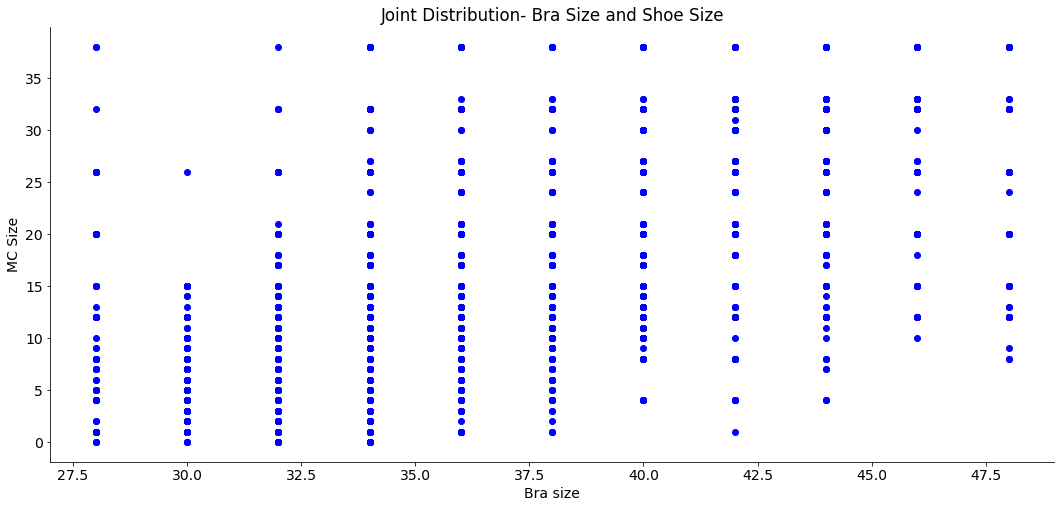

In [81]:
# YOUR CODE HERE
plt.figure(figsize=(18,8))
plt.title('Joint Distribution- Bra Size and Shoe Size')
plt.xlabel('Bra size')
plt.ylabel('MC Size')
plt.plot(mc_df['bra_size'], mc_df['mc_size'], 'bo')

>We can't see any significant deviation from usual behavior for bra-size, infact for all other numerical variables as well- we can expect the 'apparent' outliers, from the boxplot, to behave similarly. Now, we 'll head to preprocessing the dataset for suitable visualizations.

<a id="8"></a>
# Data Cleaning & Pre-processing
Let's handle the variables and change the dtype to the appropriate type for each column. We define a function first for creating the distribution plot of different variables. Here, is the initial distribution of features.

**Note: The final distribution plots are [below](#dist_plots).**

<a id="9"></a>
### Initial Distribution of features

In [82]:
def dist_plot(col, ax):
  mc_df[col][mc_df[col].notnull()].value_counts().plot(kind='bar', facecolor='g', ax=ax)
  return ax

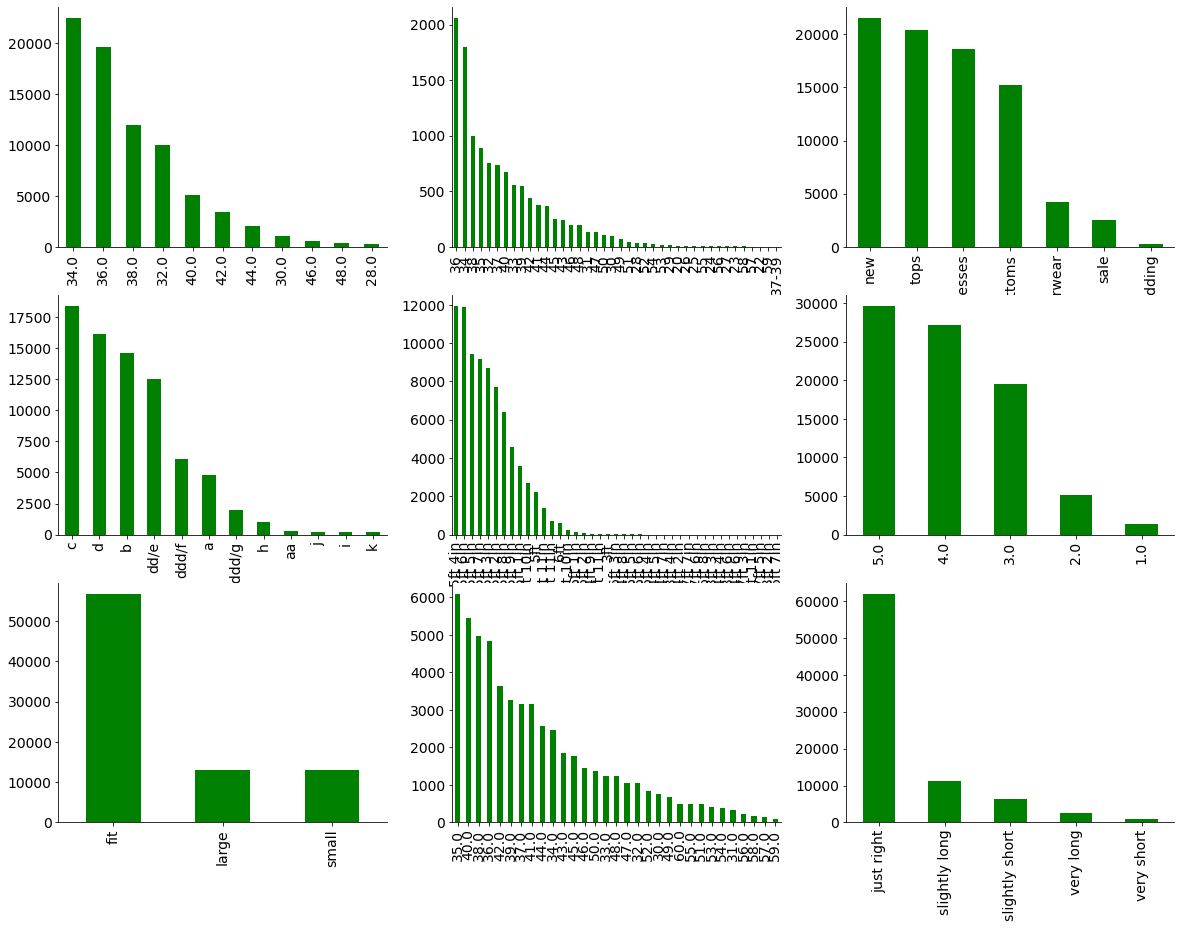

In [83]:
f, ax= plt.subplots(3, 3, figsize=(20, 15))
col=['bra_size', 'bust', 'category', 'cup_size', 'height', 'quality', 'fit', 'hips', 'length']
counter=0
for i in range(3):
  for j in range(3):
    dist_plot(col[counter], ax[i][j])
    counter+=1

<a id="10"></a>
### Step-by-step features processing:
* **bra_size:** Although it looks numerical, it only ranges from 28 to 48, with most of the sizing lying around 34-38. It makes sense to convert this to *categorical* dtype. We'll fill the NA values into an 'Unknown' category. We can see above that most of the buyers have a bra-sizing of 34 or 36.
* **bust**- We can see by looking at the values which are not null, that bust should be an integer dtype. We also need to handle a special case where bust is given as - '37-39'. We'll replace the entry of '37-39' with the mean, i.e.- 38, for analysis purposes. Now we can safely convert the dtype to int. However, considering that **roughly 86% of the bust data is missing**, eventually it was decided to remove this feature.
* **category**- none missing; change to dtype *category*.
* **cup size**- Change the dtype to *category* for this column. This col has around 7% missing values. Taking a look at the rows where this value is missing might hint us towards how to handle these missing values.

In [84]:
mc_df['bra_size']=mc_df['bra_size'].fillna('Unknown')
mc_df['bra_size']= mc_df['bra_size'].astype('category').cat.as_ordered()
mc_df.at[37313, 'bust']='38'
mc_df['bust']= mc_df['bust'].fillna(0).astype(int)
mc_df['category']= mc_df['category'].astype('category')

In [85]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   item_id         82790 non-null  int64   
 1   waist           2882 non-null   float64 
 2   mc_size         82790 non-null  int64   
 3   quality         82722 non-null  float64 
 4   cup_size        76535 non-null  object  
 5   hips            56064 non-null  float64 
 6   bra_size        82790 non-null  category
 7   category        82790 non-null  category
 8   bust            82790 non-null  int64   
 9   height          81683 non-null  object  
 10  user_name       82790 non-null  object  
 11  length          82755 non-null  object  
 12  fit             82790 non-null  object  
 13  user_id         82790 non-null  int64   
 14  shoe_size       27914 non-null  float64 
 15  shoe_width      18607 non-null  object  
 16  review_summary  76065 non-null  object  
 17  review_text 

>We can't see anything glaring from the rows where this data is missing, however, as per the curator of the dataset- "***Note that these datasets are highly sparse, with most products and customers having only a single transaction.***" It does point to that maybe these customers have not bought lingerie from modcloth yet and so modcloth does not have that data. So, it makes sense to fill these null values as 'Unknown'. From the prevalence of the values like dd/e, ddd/f, and dddd/g, we can assume these to be legit cup_sizes, also confirmed by [**this**](https://www.herroom.com/full-figure-bra-cup-sizing,905,30.html) article, where some brands change the cup size dd to e, ddd to f etc. We can directly convert this to *category* dtype.

In [86]:
mc_df.cup_size.fillna('Unknown', inplace=True)
mc_df.cup_size= mc_df.cup_size.astype('category').cat.as_ordered()



In [87]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   item_id         82790 non-null  int64   
 1   waist           2882 non-null   float64 
 2   mc_size         82790 non-null  int64   
 3   quality         82722 non-null  float64 
 4   cup_size        82790 non-null  category
 5   hips            56064 non-null  float64 
 6   bra_size        82790 non-null  category
 7   category        82790 non-null  category
 8   bust            82790 non-null  int64   
 9   height          81683 non-null  object  
 10  user_name       82790 non-null  object  
 11  length          82755 non-null  object  
 12  fit             82790 non-null  object  
 13  user_id         82790 non-null  int64   
 14  shoe_size       27914 non-null  float64 
 15  shoe_width      18607 non-null  object  
 16  review_summary  76065 non-null  object  
 17  review_text 

* **fit**- Change the dtype to *category* for this column. We can see that a vast majority of customers gave a good 'fit' feedback for the items on Modcloth!

In [88]:
mc_df.fit= mc_df.fit.astype('category')

* **height**- We need to parse the height column as currently it is a string object, of the form - Xft. Yin. It will make sense to convert height to cms. We also take a look at the rows where the height data is missing.

In [89]:
def get_cms(val):
  if type(val)==type(1.0):
    return 
  try:
    return (int(val[0])*30.48 + int(val[4:-2])*2.54)
  except:
    return (int(val[0])*30.48)


In [90]:

mc_df.height= mc_df.height.apply(get_cms)
mc_df

,item_id,waist,mc_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34,new,36,167.64,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36,new,0,157.48,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32,new,0,170.18,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36,new,0,157.48,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,b,NaN,36,outerwear,0,172.72,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!
82786,807722,NaN,12,5.0,ddd/f,NaN,34,outerwear,0,165.10,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,807722,NaN,12,5.0,dddd/g,36.0,32,outerwear,0,162.56,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,807722,NaN,12,4.0,Unknown,NaN,Unknown,outerwear,0,160.02,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


> This filtering gives us interesting observations here:
> 1. Some customers have given bra_size, cup_size data, whereas all other measurements are empty- possible first-time purchase at Modcloth for lingerie!
> 2. Some customers have given shoe_size and all other measurements are empty- possible first-time purchase at Modcloth for shoes!
>     
> It leads us to saying that there are some first-time buyers in the dataset, also talked about by the authors of the data in [1]- about the sparsity of the data due to 1 transactions! Also, as we have no data about the height of these customers, it only makes sense to leave the missing values in the column as it is and **possibly remove these rows for future statistical modeling.** We have removed the corresponding rows.
>
>
><a id="11"></a>
> # Feature Engineering 
> ## Creating a new feature of first_time_user
> 
> Building on our observations above, it makes sense to identify the transactions which belong to first time users. We use the following logic to identify such trxns:
> * If bra_size/cup_size have a value and height, hips, shoe_size, shoe_width and waist do not- it is a first time buyer of lingerie.
> * If shoe_size/shoe_width have a value and bra_size, cup_size, height, hips, and waist do not- it is a first time buyer of shoes.
> * If hips/waist have a value and bra_size, cup_size, height, shoe_size, and shoe_width do not- it is a first time buyer of a dress/tops.
> 
> Below we will verify the above logic, with samples, before we create the new feature.
> 
> **1. Looking at the few rows where either bra_size or cup_size exists, but no other measurements are available.**
>
>**2. Looking at the few rows where either shoe_size or shoe_width exists, but no other measurements are available.**
>
>**3. Looking at the few rows where either hips or waist exists, but no other measurements are available.**

In [91]:
lingerie_cond= (mc_df['bra_size'] != 'Unknown')| (mc_df['cup_size'] != 'Unknown') & mc_df['height'].isnull() & mc_df['hips'].isnull() & mc_df['shoe_size'].isnull() & mc_df['shoe_width'].isnull() & mc_df['waist'].isnull()

In [92]:
shoe_cond= (mc_df['shoe_size'].notnull())| (mc_df['shoe_width'].notnull()) & (mc_df['bra_size']=='Unknown') & (mc_df['hips'].isnull()) & (mc_df['cup_size']=='Unknown') & (mc_df['height'].isnull()) & mc_df['waist'].isnull()

>Now we add a new column to the original data- *first_time_user*, which is a bool feature which indicates if a user, of a transaction, is a first-time user or not. This is based on the grounds that Modcloth has no previous information about the person, infact it is possible that the new user did multiple transactions in the first time!

In [93]:
dress_cond=(mc_df['hips'].notnull())| (mc_df['waist'].notnull()) & (mc_df['bra_size']=='Unknown') & (mc_df['shoe_size'].isnull()) & (mc_df['cup_size']=='Unknown') & (mc_df['height'].isnull()) & mc_df['shoe_width'].isnull()

In [94]:
mc_df['first_time_user']=(lingerie_cond|dress_cond|shoe_cond)
print(mc_df)

       item_id  ...  first_time_user
0       123373  ...             True
1       123373  ...             True
2       123373  ...             True
3       123373  ...             True
4       123373  ...             True
...        ...  ...              ...
82785   807722  ...             True
82786   807722  ...             True
82787   807722  ...             True
82788   807722  ...            False
82789   807722  ...             True

[82790 rows x 19 columns]


* **hips**-
Hips column has a lot of missing values ~ 32.28%! We know this data would possibly be missing because Modcloth never got this data from the user most probably. We cannot remove such a significant chunk of the data, so we need another way of handling this feature. We will bin the data- on the basis of quartiles.
* **length**- There are only 35 missing rows in length, we'll take a look at these. We saw that most probably the customers did not leave behind the feedback or the data was corrupted in these rows. However, we should be able to impute these values using review related fields (if they are filled!). Or we could also simply choose to remove these rows. For the sake of this analysis, we will remove these rows.
* **quality**- There are only 68 missing rows in quality, we'll took a look at these. Similarly to length, the customers did not leave behind the feedback or the data was corrupted in these rows. We will remove these rows and convert the dtype to an ordinal variable (ordered categorical).

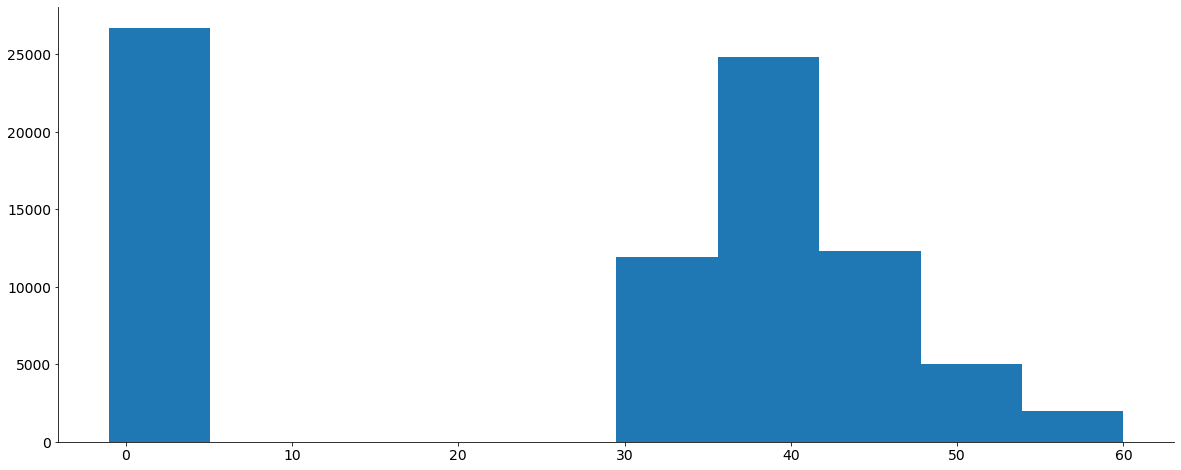

In [95]:
mc_df.hips= mc_df.hips.fillna(-1.0)
plt.hist(mc_df.hips)
plt.show()

In [96]:
bins=[-5, 0, 31, 37, 40, 44, 75]
labels= ['Unknown', 'XS', 'S', 'M', 'L', 'XL']
mc_df.hips= pd.cut(mc_df.hips, bins, labels=labels)
mc_df.hips

0              M
1             XS
2        Unknown
3        Unknown
4        Unknown
          ...   
82785    Unknown
82786    Unknown
82787          S
82788    Unknown
82789          M
Name: hips, Length: 82790, dtype: category
Categories (6, object): ['Unknown' < 'XS' < 'S' < 'M' < 'L' < 'XL']

In [97]:
missing_length_rows= mc_df[mc_df['length'].isnull()].index
mc_df.drop(missing_length_rows, axis=0, inplace=True)


In [98]:
missing_quality_rows= mc_df[mc_df['quality'].isnull()].index
mc_df.drop(missing_quality_rows, axis=0, inplace=True)
mc_df.quality= mc_df.quality.astype('category').cat.as_ordered()

In [99]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82697 entries, 0 to 82789
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          82697 non-null  int64   
 1   waist            2832 non-null   float64 
 2   mc_size          82697 non-null  int64   
 3   quality          82697 non-null  category
 4   cup_size         82697 non-null  category
 5   hips             82697 non-null  category
 6   bra_size         82697 non-null  category
 7   category         82697 non-null  category
 8   bust             82697 non-null  int64   
 9   height           81594 non-null  float64 
 10  user_name        82697 non-null  object  
 11  length           82697 non-null  object  
 12  fit              82697 non-null  category
 13  user_id          82697 non-null  int64   
 14  shoe_size        27876 non-null  float64 
 15  shoe_width       18581 non-null  object  
 16  review_summary   75976 non-null  object 

In [100]:
mc_df.isna().sum()

item_id                0
waist              79865
mc_size                0
quality                0
cup_size               0
hips                   0
bra_size               0
category               0
bust                   0
height              1103
user_name              0
length                 0
fit                    0
user_id                0
shoe_size          54821
shoe_width         64116
review_summary      6721
review_text         6721
first_time_user        0
dtype: int64

* **review_summary/ review_text**- The NA values are there because these reviews are simply not provided by customers. Let's just fill those as 'Unknown'.
* **shoe_size** -  Roughly 66.3% of the shoe_size data is missing. We will change the shoe_size into *category* dtype and fill the NA values as 'Unknown'.
* **shoe_width** - Roughly 77.5% of the shoe_width data is missing. We will fill the NA values as 'Unknown' 
* **waist**- Waist column has the highest number of missing values - 96.5%! We will drop this column.
* **bust**- 85.6% missing values and highly correlated to bra_size. Remove.
* **user_name**- user_name itself is not needed with the user_id given. Remove.

To convert shoe_width to an ordered category type we have to import CategoricalDType and supply the order of the categories.

In [101]:
from pandas.api.types import CategoricalDtype
shoe_widths_types=CategoricalDtype(categories=['Unknown', 'narrow', 'average', 'wide'], ordered=True)
mc_df['review_summary']= mc_df['review_summary'].fillna('Unknown')
mc_df['review_text']= mc_df['review_text'].fillna('Unknown')
mc_df['shoe_size']= mc_df['shoe_size'].fillna('Unknown')
mc_df['shoe_size']= mc_df['shoe_size'].astype('category').cat.as_ordered()
mc_df['shoe_width']= mc_df['shoe_width'].fillna('Unknown')
mc_df['shoe_width']= mc_df['shoe_width'].astype(shoe_widths_types)
mc_df.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)

In [104]:
mc_df.isnull().sum()

item_id            0
mc_size            0
quality            0
cup_size           0
hips               0
bra_size           0
category           0
height             0
length             0
fit                0
user_id            0
shoe_size          0
shoe_width         0
review_summary     0
review_text        0
first_time_user    0
dtype: int64

In [103]:
missing_height_rows= mc_df[mc_df['height'].isnull()].index
mc_df.drop(missing_height_rows, axis=0, inplace=True)

We can see that now there are no more missing values! We can move onto visualizing and gaining more insight about the data.

<a id="12"></a>
# EDA via visualizations

<a id="13"></a>
<a id='dist_plots'></a>
## 1. Distribution of different features over Modcloth dataset

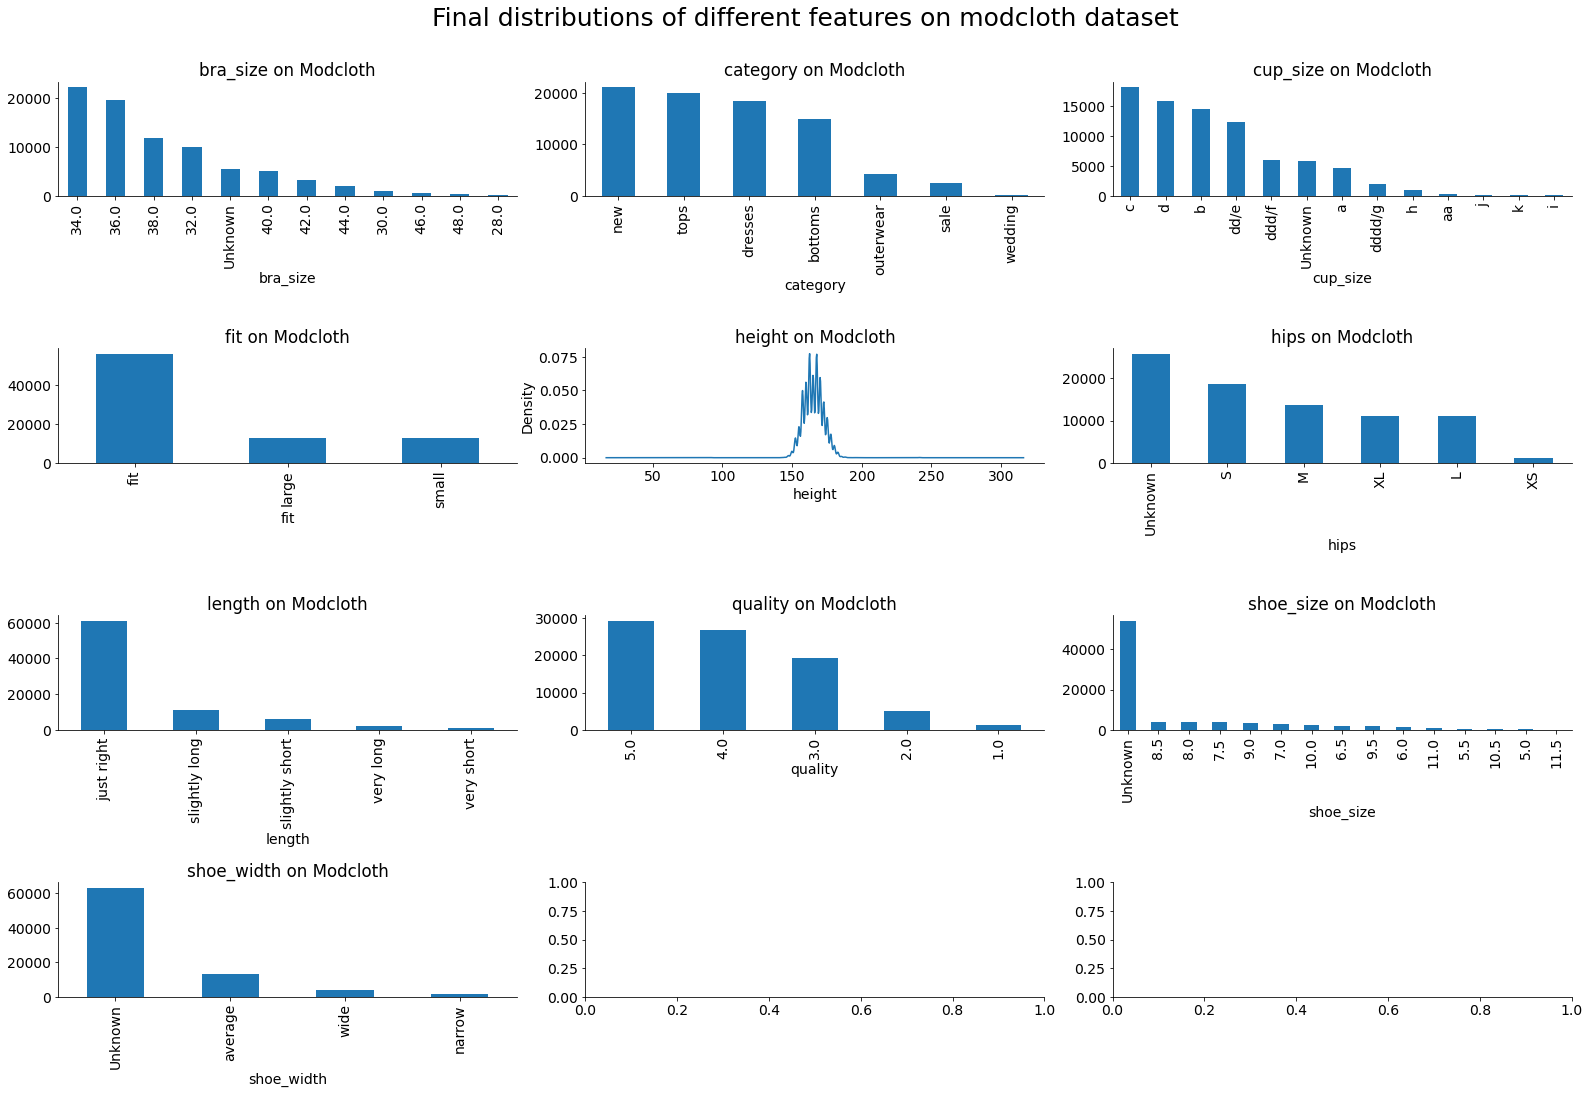

In [109]:
def plot_dist(col, ax):
  if col!='height':
    mc_df[col].value_counts().plot(kind='bar', ax=ax)
  else:
    mc_df[col].plot(kind='density', ax=ax)
  ax.set_xlabel(f"{col}")
  ax.set_title(f"{col} on Modcloth")
  return ax
fig, ax= plt.subplots(4, 3, figsize=(22, 15))
fig.tight_layout(h_pad=9, w_pad=2, rect=[0,0.03, 1, 0.93])
cols=['bra_size', 'category', 'cup_size', 'fit', 'height', 'hips', 'length', 'quality', 'shoe_size', 'shoe_width']
k=0
for i in range(4):
  for j in range(3):
    try:
      plot_dist(cols[k], ax[i][j])
    except:
      pass
    k=k+1
plt.suptitle('Final distributions of different features on modcloth dataset', fontsize=25)
plt.show()

## 2. Categories vs. Fit$/$Length$/$Quality
Here, we will visualize how the items of different categories fared in terms of - fit, length, and quality. This will tell Modcloth which categories need more attention! 

I have plotted 2 distributions in categories here:

**1. Unnormalized**- viewing the frequency counts directly- for comparison across categories. We also include the best fit, length, or quality measure in this plot.

**2. Normalized** -  viewing the distribution for the category after normalizing the counts, amongst the category itself- it will help us compare what are major reason for return amongst the category itself. We exclude the best sizing & quality measures, so as to focus on the pre-dominant reasons of return per category (if any).

In [ ]:
def plot_barh(df, col, stacked):
  df.plot(kind='barh', stacked=stacked)
  fig= plt.figure(figsize(24,12))
  plt.xlabel('Frequency')
  plt.ylabel('Category')
  plt.title('Title')

- **Category vs. Fit**

Observations:
* Best-fit response (*fit*) has been highest for *new, dresses, and tops* categories. 
* Overall maximum bad fit-feedback has belonged mostly to 2 categories- *new and tops*! *Dresses and bottoms* categories follow. 
* *Weddings, outerwear, and sale* are not prominent in our visualization- mostly due to the lack of transactions in these categories.

Here, we can see that amongst the categories themselves:
* Wedding, tops, & outerwear categories usually have more returns due to large sizing.
* New, sale, & bottoms usually have frequent returns due to small sized buys.
* Dresses has similar return reasons, in terms of fit.

- **Category vs Length**

* Best length-fitting ('just right') belongs to tops, new, dresses and bottoms! (Also due to predominance of these categories in our total transactions- **they make up almost 92% of our transactions!**)
* All transactions share a similar order of reasons for return (in the order of importance), which is kind of intuitive as well:
    * slightly long
    * slightly short
    * very long
    * very short

The normalized plot, focusing on the problems allows us to dig deeper into length-wise reasons of return per category:
* Customers tend to make 'slightly long' purchases in *bottoms, new, sale, & tops* categories.
* 'slightly short' returns take place mostly in *dresses and wedding * categories.

- **Category vs Quality**

* Almost the same share of people have rated the categories of *tops, new, dresses, & bottoms* as 5, 4, & 3.
* All the trends in terms of share of ratings seems to be constant across categories.

* Here also we can assert our previous observation that all the categories share similar share of ratings.
* To nitpick- *new , sale & tops* seem to have a higher share than normal of bad ratings (1.0 & 2.0) in terms of quality.

<a id="15"></a>
### 2. Total Number of Users vs Total Number of items bought
Visualizing the total number of users who bought *x* number of items, where we affirm the author's [[1]](#references) statement that the data is very sparse with a major chunk (38.45%) of the users who bought only 1 item from the website during the time this data was collected. 

In [113]:
total_users=[]
items_bought=[]
for i in range(min(mc_df.user_id.value_counts()), (max(mc_df.user_id.value_counts())+1)):
  all_users= sum(mc_df.user_id.value_counts()==i)
  if all_users!=0:
    total_users.append(all_users)
    items_bought.append(i)


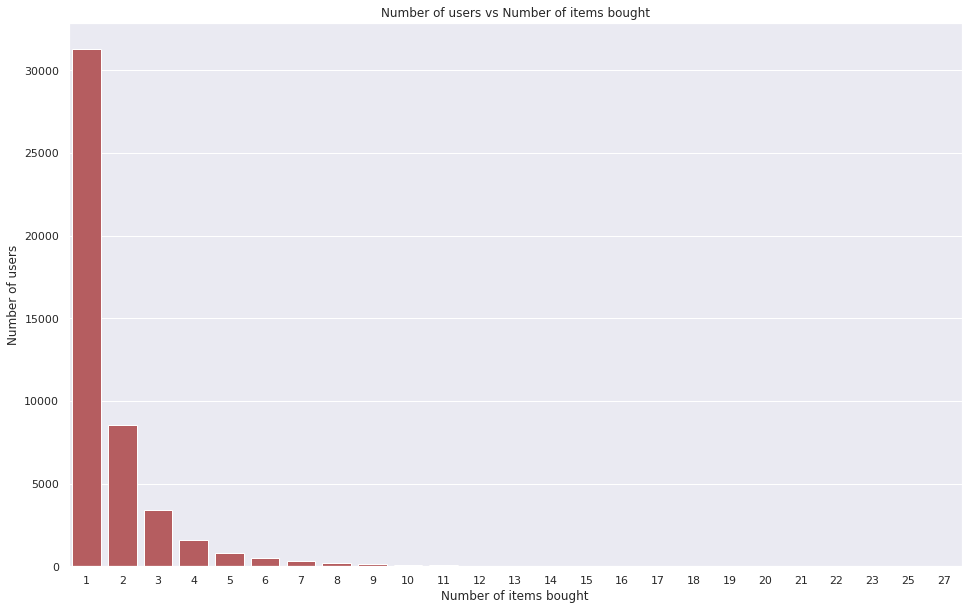

In [114]:
import seaborn as sns
sns.set()
plt.figure(figsize=(16,10))
sns.barplot(x=items_bought, y= total_users, color='r')
plt.xlabel('Number of items bought')
plt.ylabel('Number of users')
plt.title('Number of users vs Number of items bought')
plt.show()

* A **major chunk of the users (~40%) have only bought 1 item from Modcloth** during the time this data was collected. Although we found only 903 out of those were first time users (no previous data existed of these customers). This explains and reaffirms the dataset curator's statement about sparsity of the data.
* Most users bought 1, 2, or 3 products from Modcloth out of the ~80,000 transactions in this dataset.

<a id="16"></a>
## 3. Height vs shoe_size -  Modcloth customers
It would be interesting to see if there exists a linear relation between the height of a person and their shoe-size, i.e.- it will mean shoe-size increases with increase in height!

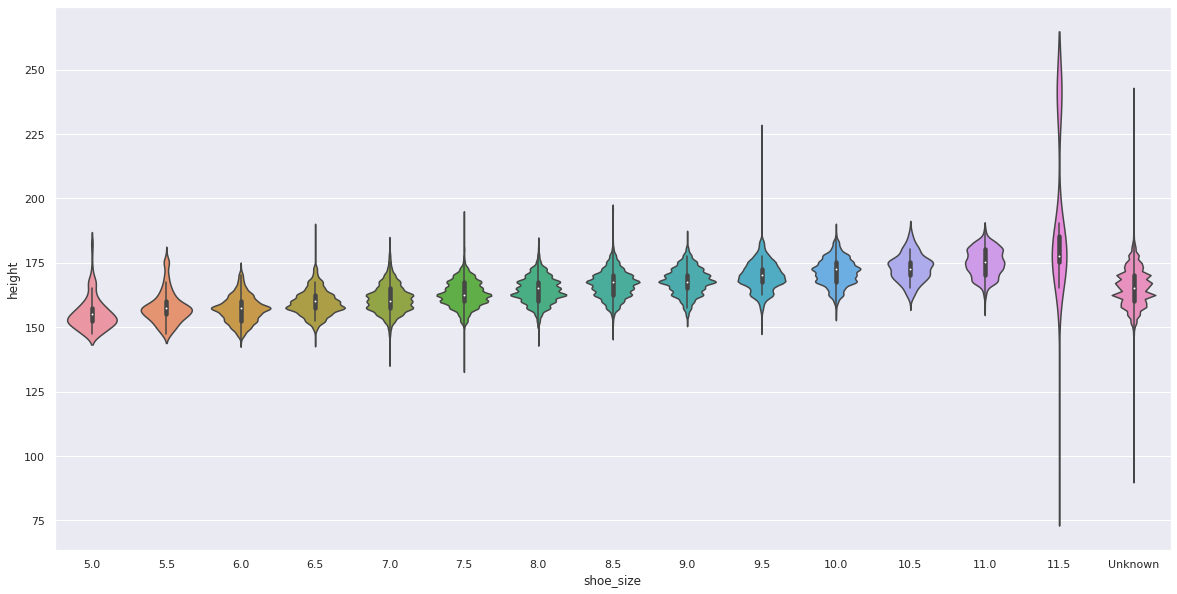

In [115]:
plt.figure(figsize=(20,10))
sns.violinplot(x='shoe_size', y='height', data=mc_df)
plt.show()

We can see here a "linear correlation between foot size and height". This observation was also seen [here](https://www.statcrunch.com/5.0/viewreport.php?reportid=35115).